In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("/home/cacaprog/learning-projects/ml-zoomcamp/data/car_price_clean.csv")

In [35]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [36]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [37]:
price_avg = df.price.mean()
price_avg

40594.737032063116

In [38]:
# create a price binary for our classification model
df['above_average'] = df['price'].apply(lambda x: 1 if x > price_avg else 0)
df.above_average.head()

0    1
1    1
2    0
3    0
4    0
Name: above_average, dtype: int64

Split dataset
- train/validation/test with 60%/20%/20%


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [41]:
df_full_train.shape

(9531, 11)

In [42]:
df_test.shape

(2383, 11)

In [43]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [44]:
df_train.shape

(7148, 11)

In [45]:
df_val.shape

(2383, 11)

In [46]:
# y values
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [47]:
df_train = df_train.drop(columns=['price', 'above_average']).reset_index(drop=True)
df_val = df_val.drop(columns=['price', 'above_average']).reset_index(drop=True)
df_test = df_test.drop(columns=['price', 'above_average']).reset_index(drop=True)

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7148 entries, 0 to 7147
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               7148 non-null   object 
 1   model              7148 non-null   object 
 2   year               7148 non-null   int64  
 3   engine_hp          7148 non-null   float64
 4   engine_cylinders   7148 non-null   float64
 5   transmission_type  7148 non-null   object 
 6   vehicle_style      7148 non-null   object 
 7   highway_mpg        7148 non-null   int64  
 8   city_mpg           7148 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 502.7+ KB


In [49]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               2383 non-null   object 
 1   model              2383 non-null   object 
 2   year               2383 non-null   int64  
 3   engine_hp          2383 non-null   float64
 4   engine_cylinders   2383 non-null   float64
 5   transmission_type  2383 non-null   object 
 6   vehicle_style      2383 non-null   object 
 7   highway_mpg        2383 non-null   int64  
 8   city_mpg           2383 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 167.7+ KB


In [50]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               2383 non-null   object 
 1   model              2383 non-null   object 
 2   year               2383 non-null   int64  
 3   engine_hp          2383 non-null   float64
 4   engine_cylinders   2383 non-null   float64
 5   transmission_type  2383 non-null   object 
 6   vehicle_style      2383 non-null   object 
 7   highway_mpg        2383 non-null   int64  
 8   city_mpg           2383 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 167.7+ KB


### ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables

In [51]:
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [52]:
from sklearn.metrics import roc_auc_score

In [53]:
auc_scores = {}

In [54]:
# Evaluate AUC  for every numerical variable
num_df_train = df_train[numerical]

for v in num_df_train.columns:
    feature_data = num_df_train[v]
    auc = roc_auc_score(y_train, feature_data)
    auc_scores[v] = auc

In [55]:
auc_scores

{'year': 0.687551492804683,
 'engine_hp': 0.9171031265539011,
 'engine_cylinders': 0.766116490165669,
 'highway_mpg': 0.3669412128227987,
 'city_mpg': 0.3265755356754767}

In [56]:
y_train.mean()

0.27322327923894796

In [57]:
from collections import Counter

In [60]:
Counter(y_train)

Counter({1: 1953, 0: 5195})

Question 1: Which numerical variable (among the following 4) has the highest AUC?

- engine_hp

In [61]:
from sklearn.feature_extraction import DictVectorizer

In [62]:
dv = DictVectorizer(sparse=False)

In [63]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

X_train = dv.fit_transform(train_dicts)

In [64]:
X_train.shape

(7148, 954)

In [65]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

X_val = dv.transform(val_dicts)

In [66]:
X_val.shape

(2383, 954)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lr = LogisticRegression(solver='liblinear', 
                        C=1.0, 
                        max_iter=1000)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [70]:
y_pred = lr.predict_proba(X_val)[:,1]

In [71]:
y_pred

array([0.64243737, 0.01508096, 0.48507709, ..., 0.00528616, 0.99998722,
       0.09609983])

In [72]:
roc_auc_score(y_val, y_pred).round(3)

0.977

Question 2: What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.979

In [73]:
thresholds = np.linspace(0, 1, 101)

In [74]:
from sklearn.metrics import recall_score, precision_score

In [75]:
score = []

for t in thresholds:
    recall = recall_score(y_val, y_pred >= t)
    precion = precision_score(y_val, y_pred >= t)

    score.append([t, recall, precion])
    

/home/cacaprog/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
columns = ['threshold', 'recall', 'precision']
score = pd.DataFrame(score, columns=columns).reset_index(drop=True)

In [77]:
score

,threshold,recall,precision
0,0.00,1.000000,0.274444
1,0.01,0.996942,0.437290
2,0.02,0.995413,0.489106
3,0.03,0.995413,0.523733
4,0.04,0.993884,0.544845
...,...,...,...
96,0.96,0.389908,0.996094
97,0.97,0.362385,0.995798
98,0.98,0.322630,1.000000
99,0.99,0.276758,1.000000


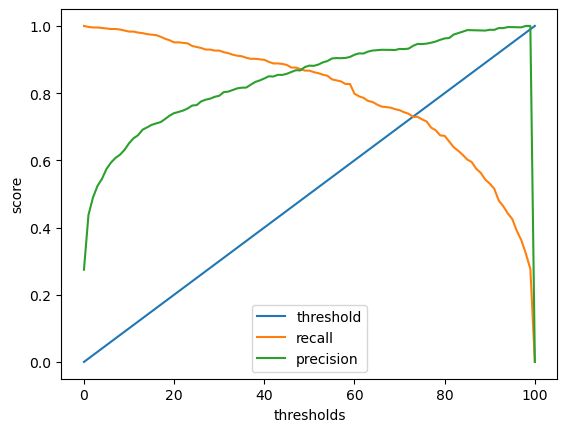

In [78]:
plt.plot(score)
plt.xlabel('thresholds')
plt.ylabel('score')
plt.legend(columns)
plt.show()

Question 3: At which threshold precision and recall curves intersect?
- 0.48

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1

In [79]:
from sklearn.metrics import f1_score

In [88]:
score = []
thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    f1 = f1_score(y_val, y_pred >= t).round(3)

    score.append([t, f1])

In [89]:
score[:5]

[[0.0, 0.431], [0.01, 0.608], [0.02, 0.656], [0.03, 0.686], [0.04, 0.704]]

In [90]:
columns = ['threshold', 'f1_score']
score = pd.DataFrame(score, columns=columns).reset_index(drop=True)

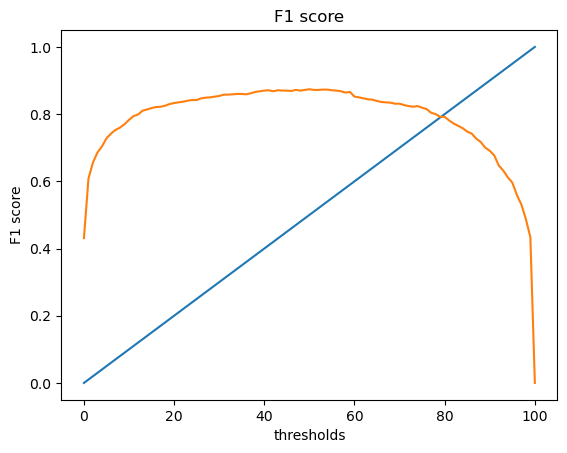

In [91]:
plt.plot(score)
plt.title('F1 score')
plt.xlabel('thresholds')
plt.ylabel('F1 score')
plt.show()

In [100]:
max(score.f1_score)

0.874

In [99]:
score.loc[score['f1_score'].idxmax()]

threshold    0.500
f1_score     0.874
Name: 50, dtype: float64

Question 4: At which threshold F1 is maximal?

- 0.52

### K-Fold CV

In [110]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [111]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [112]:
from sklearn.model_selection import KFold
from tqdm import tqdm

In [114]:
scores = []

n_splits = 5
random_state = 1

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)


for fold, (train_idx, val_idx) in enumerate(
        tqdm(kfold.split(df_full_train), 
             total=n_splits), 1):
        
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        
        y_train = df_train.above_average.values
        y_val = df_val.above_average.values
        
        dv, model = train(df_train, y_train)
        
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

        print(f"Fold {fold}: ROC AUC = {auc:.4f}")

 40%|████      | 2/5 [00:00<00:00,  7.53it/s]

Fold 1: ROC AUC = 0.9785
Fold 2: ROC AUC = 0.9775


 80%|████████  | 4/5 [00:00<00:00,  7.74it/s]

Fold 3: ROC AUC = 0.9810
Fold 4: ROC AUC = 0.9773


100%|██████████| 5/5 [00:00<00:00,  7.67it/s]

Fold 5: ROC AUC = 0.9777


In [118]:
mean_auc = np.mean(scores)
std_auc = np.std(scores)
print(f"Mean ROC AUC: {mean_auc:.3f} (±{std_auc:.4f})")

Mean ROC AUC: 0.978 (±0.0014)


Question 5: How large is standard devidation of the scores across different folds?

- 0.140

### Hyperparemeter Tuning

In [136]:
def train(df_train, y_train, C):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [137]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [141]:

C_values = [0.01, 0.1, 0.5, 10]
mean_scores = {}
n_splits = 5
random_state = 1

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)


for C in C_values:
     scores = []

     for fold, (train_idx, val_idx) in enumerate(
        tqdm(kfold.split(df_full_train), 
             total=n_splits), 1):
        
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        
        y_train = df_train.above_average.values
        y_val = df_val.above_average.values
        
        dv, model = train(df_train, y_train, C=C)
        
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

     mean_auc = np.mean(scores)
     std_auc = np.std(scores)

     mean_scores[C] = mean_auc.round(3)

     print(f"C = {C}: Mean ROC AUC = {mean_auc:.3f} (±{std_auc:.4f})")

best_C = max(mean_scores, key=mean_scores.get)
print(f"The best C value is {best_C} with a mean ROC AUC of {mean_scores[best_C]:.3f}")

100%|██████████| 5/5 [00:00<00:00,  8.37it/s]


C = 0.01: Mean ROC AUC = 0.952 (±0.0025)


100%|██████████| 5/5 [00:00<00:00,  8.23it/s]


C = 0.1: Mean ROC AUC = 0.972 (±0.0013)


100%|██████████| 5/5 [00:00<00:00,  8.05it/s]


C = 0.5: Mean ROC AUC = 0.978 (±0.0029)


100%|██████████| 5/5 [00:00<00:00,  7.86it/s]

C = 10: Mean ROC AUC = 0.981 (±0.0024)
The best C value is 10 with a mean ROC AUC of 0.981


In [142]:
mean_scores

{0.01: 0.952, 0.1: 0.972, 0.5: 0.978, 10: 0.981}

Question 6: Which C leads to the best mean score?
- 10